In [1]:
import glob
import os.path

import import_ipynb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from helpful_functions import *
from streakimage2.streakimage import FileType, StreakImage

importing Jupyter notebook from helpful_functions.ipynb


In [5]:
bg_dict = {
    "bg_ST3_g30_20x1001ms": StreakImage("./files/example_bg ST3 g30 20x1001ms.img"),
    "bg_ST4_g20_20x556ms": StreakImage(
        "./files/example_bg ST4 g20 20x556ms.img"
    ),
}

In [22]:
img_dict = {
    "ST3 test": StreakImage(
        "./files/example_streak-image ST3 g30 20x1001ms.img",
        bg_dict=bg_dict,
        title="ST3 test",
    ),
    "ST4 test": StreakImage(
        "./files/example_streak-image ST4 g20 20x556ms.img",
        bg_dict=bg_dict,
        title="ST4 test",
    ),
}

In [23]:
for key in img_dict:
    img= img_dict[key]

    offset = img.data.iloc[:10].mean()
    img.data -= offset
    img.apply_gain_correction()
    img.apply_exp_correction()
    img.apply_camera_correction()

    path = os.path.join(
        os.getcwd(), f"./files/export/{img.title}.ascii"
    )
    img.export_wexf(path)
    img_dict[key] = img

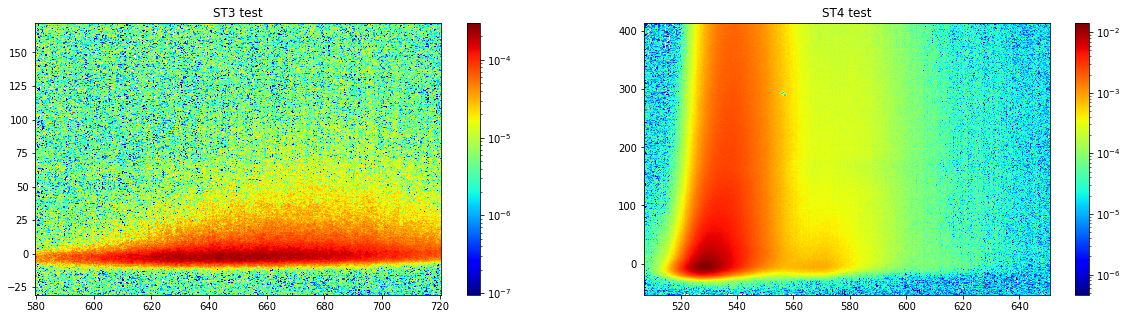

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
# axes_list = [ax for row in axes for ax in row]
# axes_iter = iter(axes_list)
axes_iter = iter(axes)

for key in img_dict:
    img = img_dict[key]
    ax = next(axes_iter)
    plot_heatmap(df=img.data, fig=fig, ax=ax, title=img.title, vmin=None, vmax=None)
# plot_heatmap(df=bg_dict['bg_ST4_g40_20x5004ms'].data, fig=fig, ax=next(axes_iter), title=img.title)

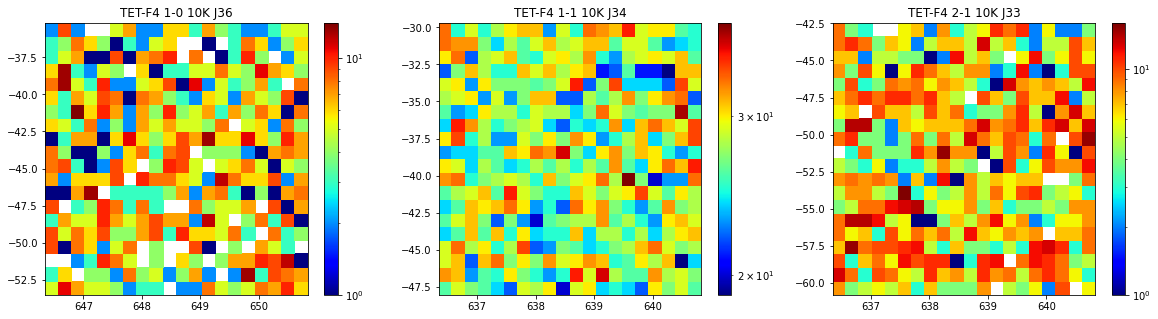

In [5]:
wl_from = None
wl_to = None
col_from = -20
col_to = None

time_from = None
time_to = None
line_from = None
line_to = 20

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes_iter = iter(axes)

for key in img_dict:
    img = img_dict[key]
    data_subset = img.data.loc[time_from:time_to, wl_from:wl_to].iloc[
        line_from:line_to, col_from:col_to
    ]
    ax = next(axes_iter)
    plot_heatmap(df=data_subset, fig=fig, ax=ax, title=img.title)
    offset = data_subset.mean().mean()
    img.data -= offset

In [6]:
for key in img_dict:
    img_dict[key].apply_gain_correction()
    img_dict[key].apply_exp_correction()
    img_dict[key].apply_camera_correction()

In [7]:
for key in img_dict:
    path = os.path.join(
        os.getcwd(), f"./local_files/glotaran_readable/{img_dict[key].title}.ascii"
    )
    img_dict[key].export_texf(path)